In [29]:
import torch
import numpy as np
attn = torch.load("/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/real63.pt").to('cpu')
print(attn.shape)

torch.Size([1, 32, 60, 218])


In [42]:
def extract_zero(attn_weights:torch.Tensor):
    iszero = attn_weights < 0.01
    zeroindex = torch.all(iszero,dim=1)
    print(zeroindex.shape)
    for i in np.array(zeroindex).tolist()[0]:
        print(i)
    print(zeroindex.sum(dim=-1))
    
extract_zero(attn)

torch.Size([1, 10, 168])
[False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, False, False, False, True, False, True, True, True, False, False, False, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, Fal

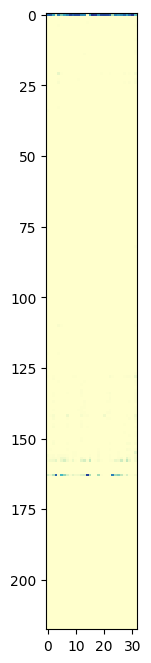

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]  # Define custom colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)  # Create custom colormap

def plot_attention(attn_weights, head):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    head_attn = attn_weights[0, head]  # 取 batch=0, 指定头
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    plt.colorbar()
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

def plot_attention_all_head(attn_weights:torch.Tensor):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    # head_attn = attn_weights.reshape(-1,attn_weights.shape[3])  # 取 batch=0, 指定头
    head_attn = attn_weights[:,:,5,:].reshape(-1,attn_weights.shape[3])  # 取 batch=0, 指定头
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    # plt.colorbar()
    plt.xticks(range(0,head_attn.shape[0],10))
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

# 示例：可视化 Draft Model 第 3 层、第 5 头
# plot_attention(
#     attn, 
#     head=5,
# )

plot_attention_all_head(
    attn
)

torch.Size([1, 32, 10, 201])


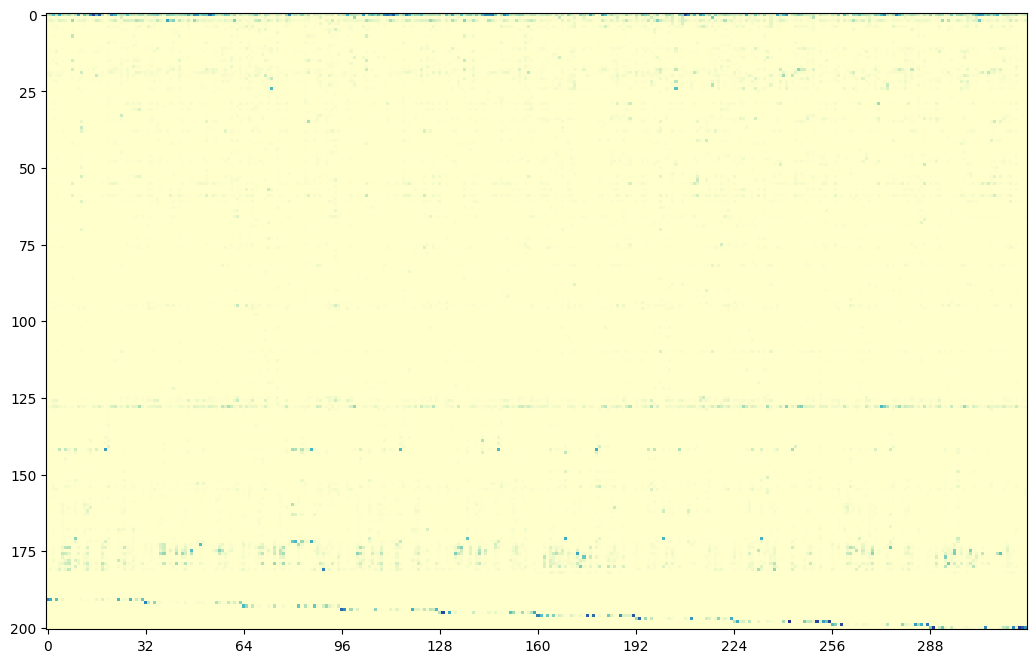

In [46]:
import torch
import numpy as np
attn = torch.load("/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/draft320.pt").to('cpu')
print(attn.shape)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]  # Define custom colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)  # Create custom colormap

def plot_attention(attn_weights, head):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    head_attn = attn_weights[0, head]  # 取 batch=0, 指定头
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    plt.colorbar()
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

def plot_attention_all_head(attn_weights:torch.Tensor):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    # head_attn = attn_weights.reshape(-1,attn_weights.shape[3])  # 取 batch=0, 指定头
    # head_attn = attn_weights
    head_attn = attn_weights.permute(0,2,1,3).reshape(-1,attn_weights.shape[3])
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    # plt.colorbar()
    plt.xticks(range(0,head_attn.shape[0],32))
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

# 示例：可视化 Draft Model 第 3 层、第 5 头
# plot_attention(
#     attn, 
#     head=5,
# )

plot_attention_all_head(
    attn
)

torch.Size([32, 1, 32, 60, 218])
torch.Size([32, 1, 32, 60, 218])


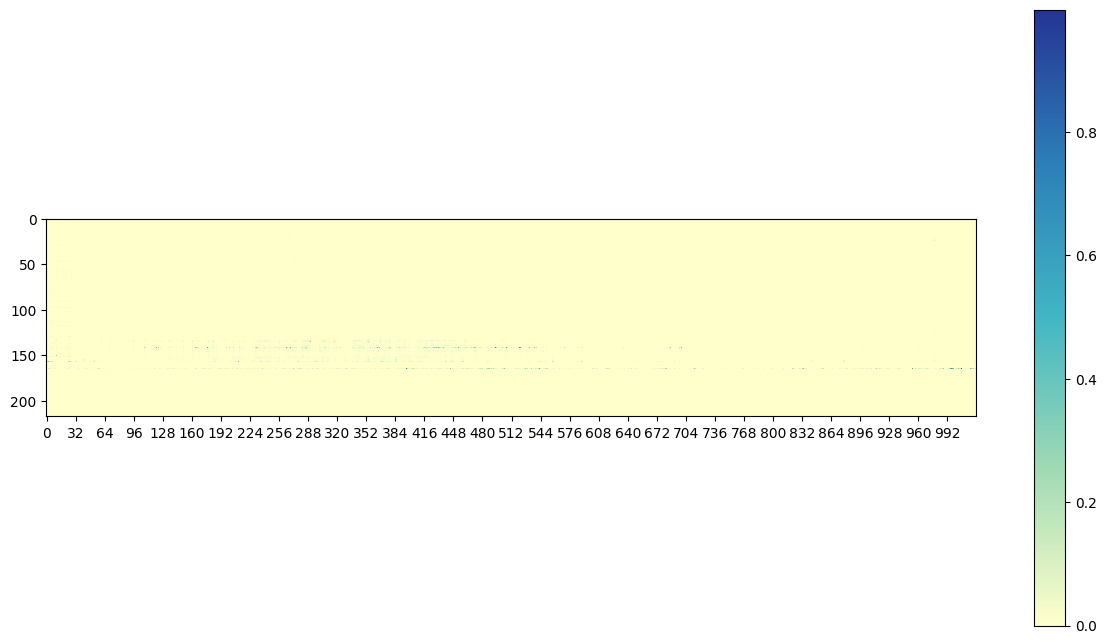

In [ ]:
import torch
import numpy as np
attns = []
for i in range(32,64):
    attns.append(torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/real{i}.pt").to('cpu'))
attns = torch.stack(attns)
print(attns.shape)

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap
colors = ["#ffffcc", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]  # Define custom colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)  # Create custom colormap

def plot_attention(attn_weights, head):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    head_attn = attn_weights[0, head]  # 取 batch=0, 指定头
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    plt.colorbar()
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

def plot_attention_all_head(attn_weights:torch.Tensor):
    # attn_weights: 当前层的注意力矩阵 [heads, seq_len, seq_len]
    # head_attn = attn_weights.reshape(-1,attn_weights.shape[3])  # 取 batch=0, 指定头
    # head_attn = attn_weights.permute(0,2,1,3)
    print(attn_weights.shape)
    head_attn = attn_weights[:,:,:,7,:].reshape(-1,attn_weights.shape[4])
    
    plt.figure(figsize=(15, 8))
    plt.imshow(head_attn.T, cmap=custom_cmap, interpolation='nearest')
    # plt.colorbar()
    plt.xticks(range(0,head_attn.shape[0],32))
    plt.show()
    # sns.heatmap(head_attn, cmap="viridis",)# xticklabels=tokens, yticklabels=tokens)
    # plt.show()

# 示例：可视化 Draft Model 第 3 层、第 5 头
# plot_attention(
#     attn, 
#     head=5,
# )

def count_importance(attn_weights:torch.Tensor):
    imps=[]
    for i in range(60):
        head_attn = attn_weights[:,:,:,i,:].reshape(-1,attn_weights.shape[4])
        aboveattn = head_attn > 0.01
        abovecount = aboveattn.to(dtype=torch.float64)
        # print(abovecount.shape)
        abovecount = abovecount.mean(dim=0)
        # print(abovecount.shape)
        impcount = abovecount > 0.5
        impcount = impcount.sum()
        print('importance_rate',impcount)
        imps.append(impcount.item())
    print(sum(imps)/len(imps))

plot_attention_all_head(attns)

# count_importance(attns)

In [30]:
super_attn = []
for i in range(32,64):
    super_attn .append( torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/real{i}.pt").to('cpu') )
super_attn = torch.stack(super_attn)
print(super_attn.shape)

torch.Size([32, 1, 32, 60, 218])


In [61]:
def super_extract_zero(super_attn_weights:torch.Tensor):
    attn_weights = super_attn_weights.view(32*32,super_attn_weights.shape[-2],super_attn_weights.shape[-1])
    iszero = attn_weights < 0.005
    zeroindex = torch.all(iszero,dim=0)
    
    print(zeroindex.shape)
    for i in np.array(zeroindex).tolist():
        print(i)
    print(zeroindex.sum(dim=-1))
        
    return zeroindex    
    # print(zeroindex.shape)
    # for i in np.array(zeroindex).tolist()[0]:
    #     print(i)
    # print(zeroindex.sum(dim=-1))
    
super_extract_zero(super_attn)

NameError: name 'super_attn' is not defined

In [ ]:

import torch
startlinear = 4
originarea = (startlinear+1)* 32
draftarea = (startlinear)*6
print(originarea,'->',originarea+32)
print(draftarea+1,'->',draftarea+6)

origin_attn = []
for i in range(originarea,originarea+32):
    origin_attn .append( torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/real{i}.pt").to('cpu') )
origin_attn = torch.stack(origin_attn)
print(origin_attn.shape)

draft_attn = []
for i in range(draftarea+1,draftarea+6):
    draft_attn.append( torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/draft{i}.pt").to('cpu') )
# draft_attn = torch.stack(draft_attn)
print(len(draft_attn),draft_attn[0].shape)

160 -> 192
25 -> 30
torch.Size([32, 1, 32, 60, 237])
5 torch.Size([1, 32, 10, 187])


In [17]:
import torch
def super_extract_zero(super_attn_weights:torch.Tensor,thres=0.05):
    attn_weights = super_attn_weights.view(-1,super_attn_weights.shape[-2],super_attn_weights.shape[-1])
    iszero = attn_weights < thres
    zeroindex = torch.all(iszero,dim=0)
    
    # print(zeroindex.shape)
    # for i in np.array(zeroindex).tolist():
    #     print(i)
    # print(zeroindex.sum(dim=-1))
        
    return zeroindex   

def extract_zero(attn_weights:torch.Tensor,thres=0.05,cutdown=0):
    iszero = attn_weights < thres
    zeroindex = torch.all(iszero,dim=1)
    # print(zeroindex.shape)
    # for i in np.array(zeroindex).tolist()[0]:
    #     print(i)
    # print(zeroindex.sum(dim=-1))
    zeroindex = zeroindex[0,:,:zeroindex.shape[2]-cutdown] # 削除不share的部分
    # print(zeroindex.shape)
    return zeroindex

def get_out_percent(origin_attn,draft_attn,thres):
    # thres = 0.005
    origin_zero = super_extract_zero(origin_attn,thres)
    draft_zero = [extract_zero(draft_attn[i],thres,cutdown=10*i+10) for i in range(len(draft_attn))]

    # print(origin_zero.shape)
    # print(len(draft_zero),draft_zero[0].shape)

    yeszeros=[]
    for i in range(len(draft_zero)):
        yeszero = origin_zero[i*10:i*10+10,:draft_zero[i].shape[1]] & draft_zero[i]
        sumyes = yeszero.sum(dim=-1)
        # print(sumyes/draft_zero[i].shape[1])
        yeszeros.append(yeszero.sum().item()/10/draft_zero[i].shape[1])

    lastavg = sum(yeszeros)/len(yeszeros)
    print('avg blank:', lastavg)
    return lastavg
    
def get_pipeline(startlinear):
    originarea = (startlinear+1)* 32
    draftarea = (startlinear)*6

    origin_attn = []
    for i in range(originarea,originarea+32):
        origin_attn .append( torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/real{i}.pt").to('cpu') )
    origin_attn = torch.stack(origin_attn)
    # print(origin_attn.shape)

    draft_attn = []
    for i in range(draftarea+1,draftarea+6):
        draft_attn.append( torch.load(f"/home/ruiyang.chen/Code/LLM/EAGLE3/eagle/checkattn/draft{i}.pt").to('cpu') )
    # draft_attn = torch.stack(draft_attn)
    # print(len(draft_attn),draft_attn[0].shape)
    
    print('[',originarea,'->',originarea+32,');[',draftarea+1,'->',draftarea+6,');',end=' ')
    print('length:',origin_attn.shape[-1],end=' ')
    
    return get_out_percent(origin_attn,draft_attn,0.01)

allavg=[]
for i in range(0,32):
    allavg.append(get_pipeline(i))

print(sum(allavg)/len(allavg))


[ 32 -> 64 );[ 1 -> 6 ); length: 218 avg blank: 0.16556962025316455
[ 64 -> 96 );[ 7 -> 12 ); length: 222 avg blank: 0.18271604938271604
[ 96 -> 128 );[ 13 -> 18 ); length: 229 avg blank: 0.18449704142011836
[ 128 -> 160 );[ 19 -> 24 ); length: 230 avg blank: 0.19223529411764706
[ 160 -> 192 );[ 25 -> 30 ); length: 237 avg blank: 0.24598870056497177
[ 192 -> 224 );[ 31 -> 36 ); length: 241 avg blank: 0.2146961325966851
[ 224 -> 256 );[ 37 -> 42 ); length: 248 avg blank: 0.23914893617021277
[ 256 -> 288 );[ 43 -> 48 ); length: 255 avg blank: 0.23282051282051283
[ 288 -> 320 );[ 49 -> 54 ); length: 262 avg blank: 0.23049504950495048
[ 320 -> 352 );[ 55 -> 60 ); length: 266 avg blank: 0.2545631067961165
[ 352 -> 384 );[ 61 -> 66 ); length: 273 avg blank: 0.255962441314554
[ 384 -> 416 );[ 67 -> 72 ); length: 276 avg blank: 0.24
[ 416 -> 448 );[ 73 -> 78 ); length: 283 avg blank: 0.25408071748878924
[ 448 -> 480 );[ 79 -> 84 ); length: 290 avg blank: 0.21452173913043476
[ 480 -> 512 );[ 85